# Calcium Flex Analysis #

## Importing the package ##
All the code I've written won't be visible to the user - it is stored in a 'package'

In [1]:
from calciumflexanalysis import calcium_flex as cal

## Importing the data ##
You can now 'call' this package on your flex data. Reading in the data requires a 'plate map' that contains all the information for every well.<br>
You can stipulate the sort of data you want to read in, e.g. 'new' or 'old' and also the type of plate map - 'short' or 'long' (see example csv's). The plate maps must follow a strict template in order to be read in correctly.  

### 'old' data, long map ###
The following example takes the old data and the 'long' plate map template - this requires the user to explicitly state what is in each and every well.

In [2]:
datafile = '14052019 C5sYFP2 IBP21 inhib 300nM to 0.3 nM.txt' # make sure your data file is in the same folder as this notebook.

longmapexample = 'long map example.csv' # the file name must be in quotations. 

# Insert these files in the CaFlexAnalysis class. Note how the user must state the type of data and plate map. 

olddatalongmap = cal.CaFlexAnalysis(raw_data = datafile, plate_map_file = longmapexample, data_type = 'old', map_type = 'long')

The data and plate map are now loaded into the script and we can proceed with the data analysis, however the user may want to check that their plate map is inputted correctly.

C:\Users\Lawrence\PROJECT FOLDER\platemapping\plate_map.py:273: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(grid[(ord(platemap['Row'].iloc[i].lower())-96), ((platemap['Column'].iloc[i]))])


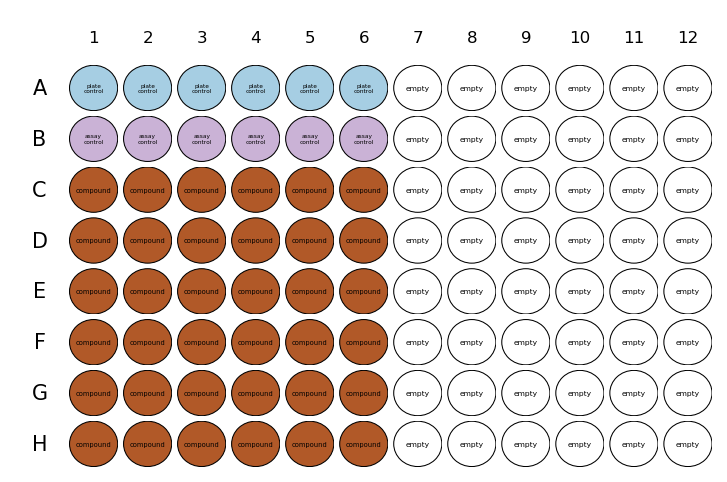

In [3]:
olddatalongmap.see_plate()

Looks okay to me! But maybe we should check the conditions too...

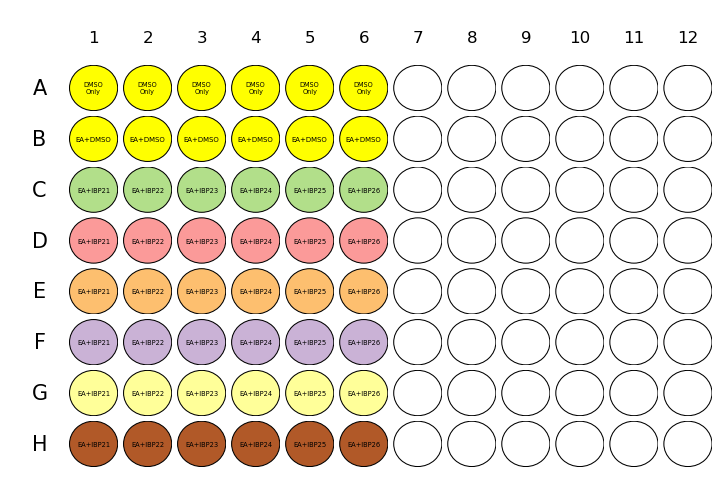

In [4]:
olddatalongmap.see_plate(labelby = 'Contents', colorby = 'Concentration')

_Phew!_ <br>
If you want to know more about what you can change within these methods, you can call for help or check the documentation. 

In [21]:
help(cal)

Help on module calciumflexanalysis.calcium_flex in calciumflexanalysis:

NAME
    calciumflexanalysis.calcium_flex

CLASSES
    builtins.object
        CaFlexAnalysis
    
    class CaFlexAnalysis(builtins.object)
     |  CaFlexAnalysis(raw_data, plate_map_file, map_type='short', data_type='old', valid=True, size=96)
     |  
     |  Class used for the analysis of Calcium Flex assays.
     |  
     |  :param raw_data: Raw, unprocessed data from experiment
     |  :type raw_data: .txt file
     |  :param plate_map_file: Filled template plate map that contains the information for each well of the well plate
     |  :type plate_map_file: .csv
     |  :param map_type: 'short' or 'long' - Denotes the type of plate map file used, default = 'short'
     |  :type map_type: str
     |  :param size: Size of well plate - 6, 12, 24, 48, 96 or 384. plate_map_file MUST have the appropriate dimensions, default = 96
     |  :type size: int
     |  :param data_type: 'new' or 'old' - denotes type of fle

Lets have a quick look at the other ways to upload the data. 

### 'new' data, short map ###

In [5]:
# text file to be read in (raw file from machine)
data = '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM.txt' 

# plate map csv file updated by user (either the 'short' or 'long' template)
my_map = 'EA 30 nM act IBP74 3nM to 3 uM.csv' # try to avoid calling your plate map 'map' 

# insert the 2 files into the 'CaFlexAnalysis' class
flex = cal.CaFlexAnalysis(raw_data = data, plate_map_file = my_map, data_type = 'new')

Maybe we should check the data for each well. 
## Visualising the data series of each well ##

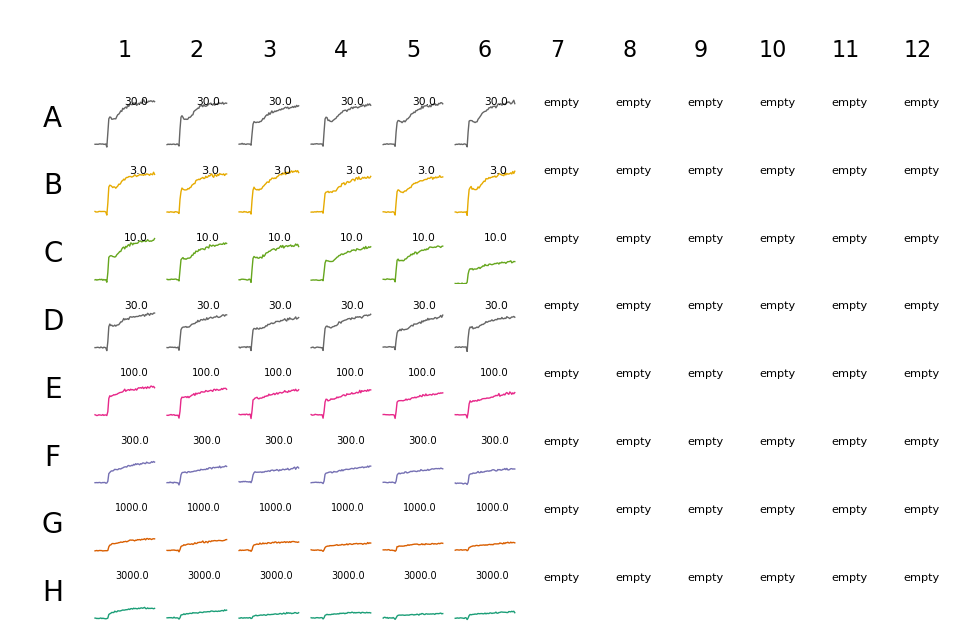

In [6]:
flex.visualise_assay(colorby = 'Concentration', labelby = 'Concentration', share_y = True)

## Invalidation ##
We can have a closer look at any dodgy looking data and invalidate it if necessary. 

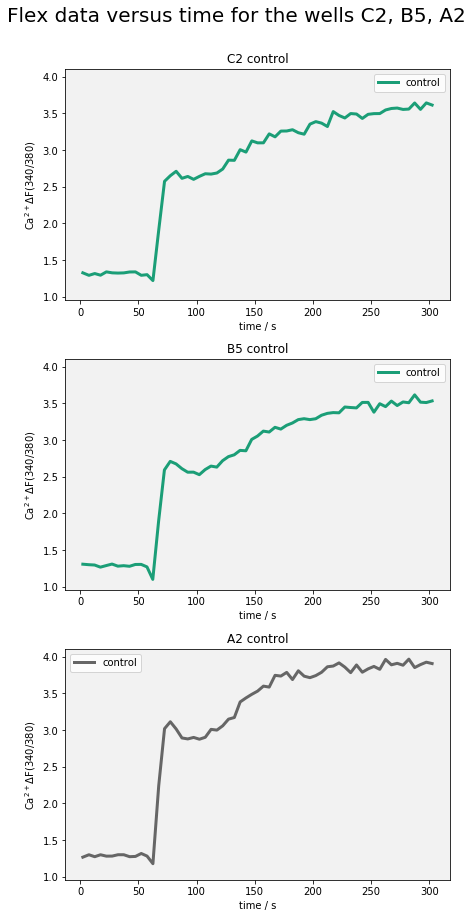

In [7]:
# # invalid wells, columns and rows can easily be removed from the data analysis

# # specific wells that look dodgy
dodgy = "C2", "B5", "A2"

# # see_wells allows the user to have a closer look at the data for specific wells
flex.see_wells(dodgy)

The user can invalidate individual wells, or entire rows and columns. 

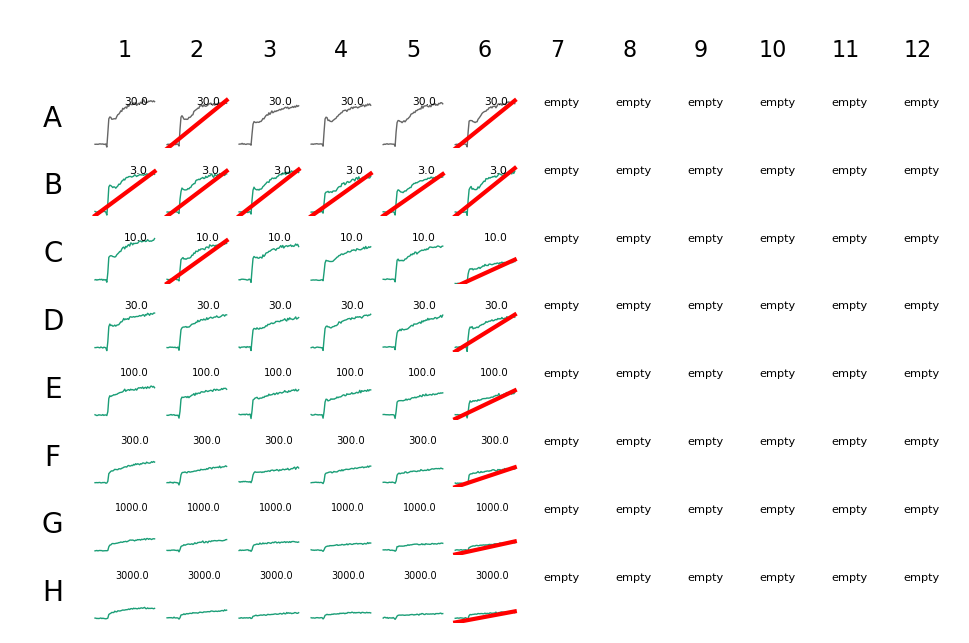

In [8]:
flex.invalidate_wells(dodgy)

flex.invalidate_rows('B')

flex.invalidate_cols(6)

flex.visualise_assay(labelby = 'Concentration', share_y = True) 

Wells marked as invalid will not be used for the subsequent data analysis. Speaking of which...

## Data Analysis ##